# 第6章
## 6.1決定木の訓練と可視化

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:,2:] #花弁の幅と長さ
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf, 
    out_file='./iris_tree.dot', 
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

`dot -Tpng iris_tree.dot -o iris_tree.png`を行う
![図](./iris_tree.png)

## 6.2 決定木による予測
上の図のような条件分岐で予測される。  
gini係数→valueの中の不順度  
緑ノードでは$1-(\frac{0}{54})^2 - (\frac{49}{54})^2 - (\frac{5}{54})^2 \approx0.168$

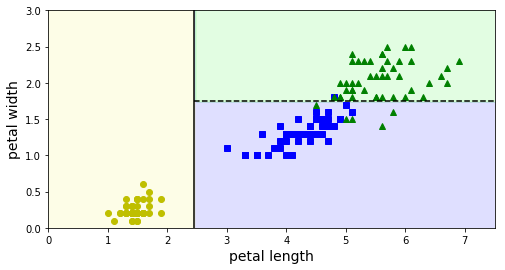

In [71]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    _x1 = np.linspace(axes[0], axes[1], 100)
    _x2 = np.linspace(axes[2], axes[3], 100)
    x1,x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred =clf.predict(X_new).reshape(x1.shape)
    custom_cmap = matplotlib.colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.3)
    if not iris:
        custom_cmap2 = matplotlib.colors.ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo',label="Iris-Setosa")
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs',label="Iris-Versicolor")
        plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^',label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)

#決定境界(上の画像から読み取る)
plt.plot([2.45, 2.45], [0, 3], 'k-')
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--') 

## 6.3 クラスの確率の推計
決定木は確率も出せる。その際の確率はvalueから計算される

In [41]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## 6.4 CART訓練アルゴリズム
sklearnにおけるDecisionTreeの訓練アルゴリズムはCART(Classification and Regression Tree)アルゴリズムである　　

分類の特徴量$k$とその閾値$t_k$の探索方法.以下のコスト関数を最小化させるようにする  


$$
J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}\\
G:不順度\\
m:インスタンス数
$$


## 6.5計算量, 6.6 ジニ不純度かエントロピーか
省略

## 6.7 正則化ハイパーパラメータ
ノンパラメトリックモデル: パラメータを持たない(or 多すぎる）と自由度が大きすぎて過学習してしまいやすいこと  
パラメトリックモデル: 逆  
自由度を下げること→正則化  
sklearn.tree.DecisionTreeClassifierクラスのハイパーパラメータは公式ドキュメントをみてください  
min_sample_leafを制限すると以下のようになる

In [50]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf_default = DecisionTreeClassifier(random_state=42)
deep_tree_clf_min_sample_leaf_limitted = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf_default.fit(Xm,ym)
deep_tree_clf_min_sample_leaf_limitted.fit(Xm,ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

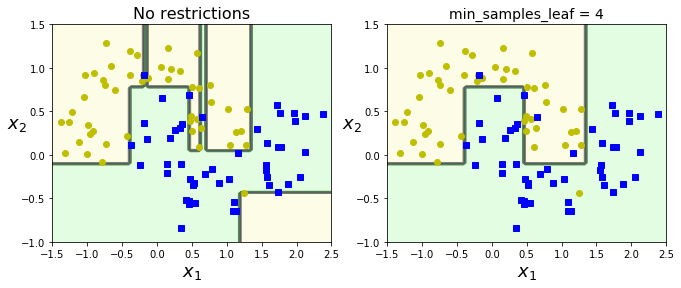

In [73]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf_default, Xm, ym, axes=[-1.5, 2.5, -1,1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf_min_sample_leaf_limitted, Xm, ym,axes=[-1.5, 2.5, -1,1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf_min_sample_leaf_limitted.min_samples_leaf), fontsize=14)
plt.show()

## 6.8回帰
分類だけでなく、回帰もできる

In [74]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)
export_graphviz(
    tree_reg, 
    out_file='./regression_tree.dot', 
    feature_names=["x1"],
    rounded=True,
    filled=True)

![hoge](./regression_tree.png)

[0, 1, -0.2, 1]

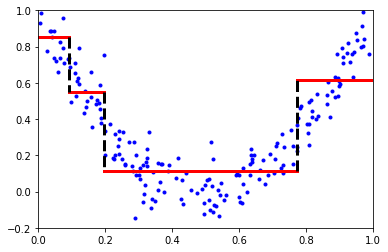

In [94]:
plt.plot(X,y,'b.')
plt.plot([0.0, 0.092],[0.854,0.854],'r-',linewidth=3)
plt.plot([0.092, 0.197],[0.552, 0.552],'r-',linewidth=3)
plt.plot([0.197, 0.772],[0.111, 0.111],'r-',linewidth=3)
plt.plot([0.772, 1],[0.615, 0.615],'r-',linewidth=3)

plt.plot([0.092, 0.092], [0.854, 0.552], 'k--', linewidth=3)
plt.plot([0.197, 0.197], [0.552, 0.111], 'k--',linewidth=3)
plt.plot([0.772, 0.772], [0.111, 0.615], 'k--',linewidth=3)

plt.axis([0, 1, -0.2, 1])

回帰は平均2乗誤差をコスト関数とする

## 6.9不安定さ
* 決定木はデータの回転に弱いこと  
* 訓練セットの小さな変化に敏感